In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

file_path = '/content/drive/My Drive/WQD7006 GROUP ASSIGNMENT/creditcard_2023.csv'
df = pd.read_csv(file_path)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
# df = pd.read_csv('/content/sample_data/creditcard_2023.csv')
print(df.head())

   id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561 -0.414116   

        V26       V27       V28    Amount  C

In [5]:
# Split the dataset based on the 'Class' column
class_0 = df[df['Class'] == 0]
class_1 = df[df['Class'] == 1]

# Display the first few rows of each subset to confirm the split
print("Class 0:")
print(class_0.head())

print("\nClass 1:")
print(class_1.head())

Class 0:
   id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561 -0.414116   

        V26       V27       V28    

In [6]:
# Sample 25,000 instances from each class
sample_class_0 = class_0.sample(n=25000, replace=True, random_state=42)
sample_class_1 = class_1.sample(n=25000, replace=True, random_state=42)

# Combine the samples into a single dataframe
sampled_df = pd.concat([sample_class_0, sample_class_1])

# Shuffle the combined dataframe
sampled_df = sampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the first few rows of the sampled dataframe
print(sampled_df.head())

       id        V1        V2        V3        V4        V5        V6  \
0  315161 -0.070335  0.220911 -0.199234  0.357768 -0.011400 -0.087971   
1  278588 -0.168161 -0.218631  0.112922 -0.998729 -0.061794  0.341233   
2   85100 -0.416784 -0.874578  1.305342 -0.501654  0.194390  0.452880   
3  108507 -0.057237 -0.689930  2.059116 -2.213854  0.083936 -0.011870   
4  305282 -0.143740  0.538641 -0.841356  0.916985 -0.405942 -0.983121   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0 -0.150753  0.045334 -0.487367  ...  0.092349 -0.201438 -0.336156 -1.098793   
1  1.861898 -0.226629  0.150598  ... -0.051408  0.482675  0.163935  0.043577   
2  0.402569  0.027401  0.490520  ...  0.014988  0.174792  0.329337  0.594062   
3  0.375660 -0.194379 -0.691269  ... -0.157702 -0.117801 -0.244737  0.605879   
4 -0.759303  0.170947 -1.305345  ...  0.304812 -0.505774 -0.341113 -0.690113   

        V25       V26       V27       V28    Amount  Class  
0  0.920403 -0.0874

In [7]:
# View information about the DataFrame
print(sampled_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      50000 non-null  int64  
 1   V1      50000 non-null  float64
 2   V2      50000 non-null  float64
 3   V3      50000 non-null  float64
 4   V4      50000 non-null  float64
 5   V5      50000 non-null  float64
 6   V6      50000 non-null  float64
 7   V7      50000 non-null  float64
 8   V8      50000 non-null  float64
 9   V9      50000 non-null  float64
 10  V10     50000 non-null  float64
 11  V11     50000 non-null  float64
 12  V12     50000 non-null  float64
 13  V13     50000 non-null  float64
 14  V14     50000 non-null  float64
 15  V15     50000 non-null  float64
 16  V16     50000 non-null  float64
 17  V17     50000 non-null  float64
 18  V18     50000 non-null  float64
 19  V19     50000 non-null  float64
 20  V20     50000 non-null  float64
 21  V21     50000 non-null  float64
 22

In [8]:
print('Dataset: ', sampled_df.shape)
sampled_df.sample(3)

Dataset:  (50000, 31)


,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
29486,96903,-0.396511,0.068234,0.781378,-2.052071,0.609766,0.828262,0.699896,-0.147355,1.638001,...,-0.281259,-0.425152,-0.278316,-2.657787,0.032324,1.657342,0.628107,0.188828,570.85,0
12791,115337,0.119894,-0.442643,1.602894,-1.342298,0.024606,0.247584,0.399252,-0.134872,-0.105055,...,-0.018491,0.389061,-0.048009,0.167160,-0.329423,-0.691982,-0.185103,-0.041806,8258.46,0
37391,366287,0.727945,0.277605,-0.682445,0.720807,0.395720,-0.334922,-0.000653,-0.006831,-0.454076,...,0.037356,-0.024499,0.080544,0.649441,-0.428142,-0.377894,0.175878,-0.039789,16686.87,1


In [9]:
sampled_df['Class'].value_counts()

Class
1    25000
0    25000
Name: count, dtype: int64

Observations:

*   We have 50000 rows of observations having 31 columns.
*   Class feature is balanced.
*   Class is the feature that indicates whether the transaction is fraudulent (1) or not (0).

# Data Processing

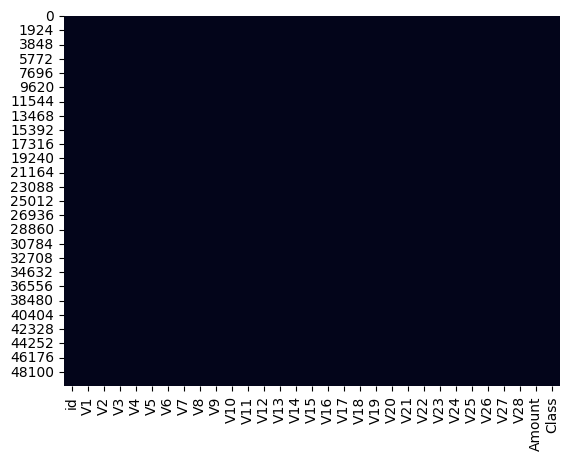

In [10]:
# Checking missing values
sns.heatmap(sampled_df.isnull(), cbar=False)
plt.show()

Observations:

*   No missing value.

In [11]:
duplicates = sampled_df.duplicated()
print ("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 2162


In [12]:
# Remove duplicate rows in place
sampled_df.drop_duplicates(inplace=True)

# Verify the number of rows after removing duplicates
print("Number of rows after removing duplicates:", sampled_df.shape[0])

Number of rows after removing duplicates: 47838


## EDA

In [13]:
# Display summary statistics
sampled_df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,47838.000000,47838.000000,47838.000000,47838.000000,47838.000000,47838.000000,47838.000000,47838.000000,47838.000000,47838.000000,...,47838.000000,47838.000000,47838.000000,47838.000000,47838.000000,47838.000000,47838.000000,47838.000000,47838.000000,47838.000000
mean,284629.812388,0.004401,0.000335,-0.000196,-0.003728,0.004593,0.004304,0.003786,-0.003291,0.002776,...,0.001315,-0.003818,-0.000886,-0.003863,0.002212,-0.007420,-0.001066,0.000325,12017.696901,0.500000
std,164346.074532,0.999149,0.999120,0.997139,0.998532,0.986426,1.001219,0.959004,1.008163,0.989857,...,1.009689,1.007685,1.001704,0.998840,1.005718,1.001106,0.978133,0.975527,6905.509672,0.500005
min,5.000000,-2.908410,-26.347731,-2.518248,-4.523597,-4.580605,-12.508317,-4.339821,-7.835776,-3.749179,...,-12.147385,-6.450353,-14.357144,-3.909213,-6.762670,-4.518994,-6.082594,-21.113391,50.130000,0.000000
25%,142251.000000,-0.557339,-0.483332,-0.643350,-0.657094,-0.288478,-0.437048,-0.277312,-0.193021,-0.561807,...,-0.167439,-0.491196,-0.237998,-0.653359,-0.561284,-0.641004,-0.303122,-0.229153,6043.717500,0.000000
50%,284238.500000,-0.088356,-0.137348,0.000908,-0.078628,0.084996,0.077576,0.235362,-0.115210,0.092005,...,-0.037948,-0.028862,-0.061355,0.009206,-0.001036,-0.026414,-0.172433,-0.011827,12011.950000,0.500000
75%,426540.250000,0.839245,0.341009,0.624652,0.702241,0.443023,0.493797,0.527177,0.046525,0.558107,...,0.145128,0.460469,0.157473,0.696078,0.559246,0.667569,0.332691,0.412663,17980.250000,1.000000
max,568623.000000,2.192285,4.352945,4.396339,2.392470,21.307863,9.352413,41.880045,5.957691,10.375016,...,8.087080,9.764651,16.475564,8.682564,9.102138,5.050186,13.086879,35.622679,24039.200000,1.000000


<ipython-input-14-3fcf5c485cfd>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax2, palette=bar_colors)


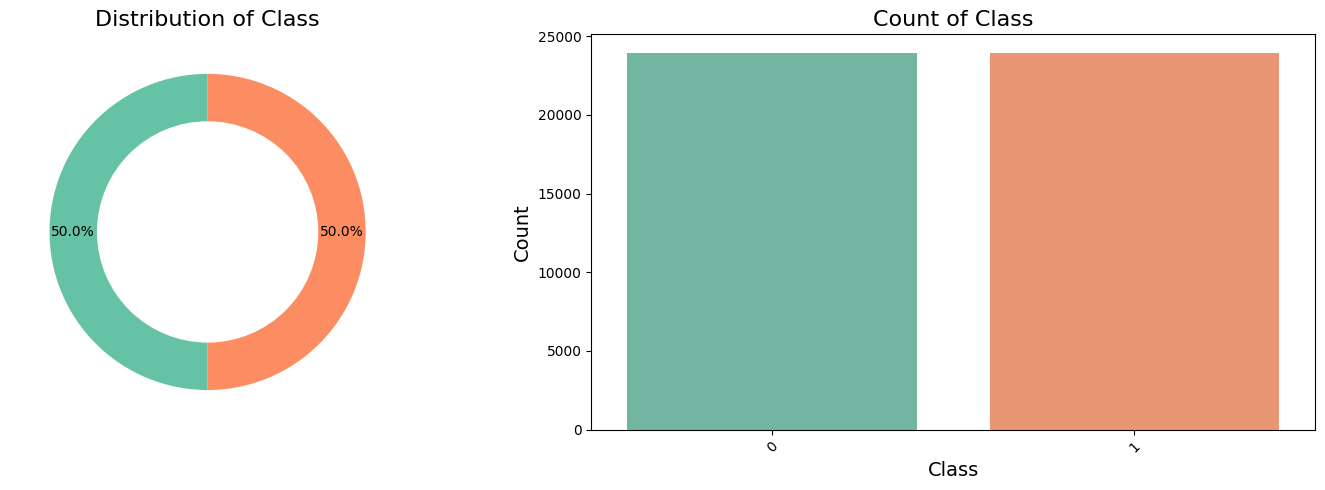

In [14]:
def single_plot_distribution(Class, sampled_df):
    # Get the value counts of the specified column
    value_counts = sampled_df[Class].value_counts()

    # Set up the figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={'width_ratios': [1, 1]})

    # Donut pie chart
    pie_colors = sns.color_palette("Set2", n_colors=3)  # Set2 palette with 3 colors
    ax1.pie(value_counts, autopct='%0.001f%%', startangle=90, pctdistance=0.85, colors=pie_colors, labels=None)
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    ax1.add_artist(centre_circle)
    ax1.set_title(f'Distribution of {Class}', fontsize=16)

    # Bar chart
    bar_colors = sns.color_palette("Set2", n_colors=len(value_counts))  # Adjusted to the number of unique values
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax2, palette=bar_colors)
    ax2.set_title(f'Count of {Class}', fontsize=16)
    ax2.set_xlabel(Class, fontsize=14)
    ax2.set_ylabel('Count', fontsize=14)

    # Rotate x-axis labels for better readability
    ax2.tick_params(axis='x', rotation=45)

    # Show the plots
    plt.tight_layout()
    plt.show()

# Class Distribution
single_plot_distribution('Class', sampled_df)

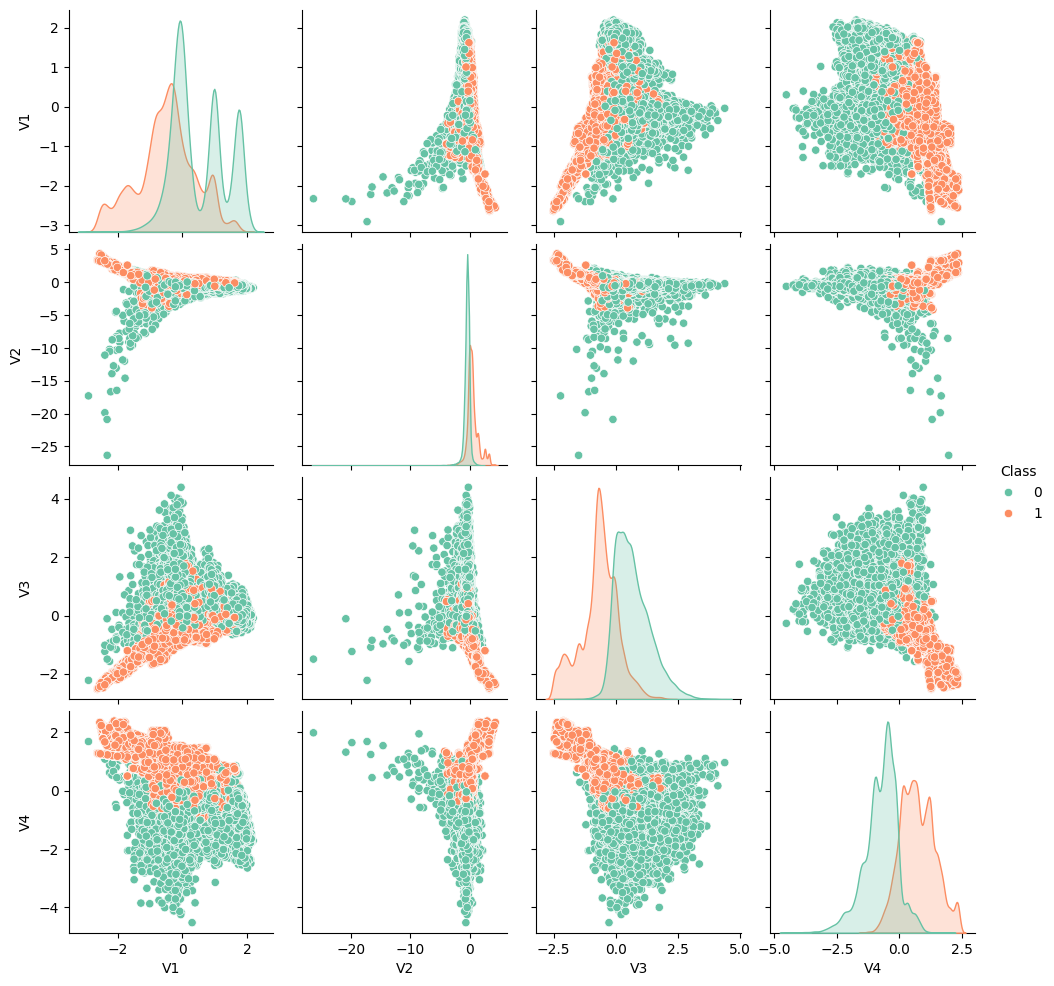

In [15]:
# Cols to Plot
columns_to_plot =['V1', 'V2', 'V3', 'V4','Class']

# Data Columns
data_to_plot = sampled_df[columns_to_plot]

# Create a dictionary to map colors to unique values of the 'Class' column
Q_colors = {0: sns.color_palette("Set2")[0], 1: sns.color_palette("Set2")[1]}

# Creating the pairplot with the specified palette fo r categorical variables
sns.pairplot(data_to_plot, hue='Class', palette=Q_colors)
plt.show()

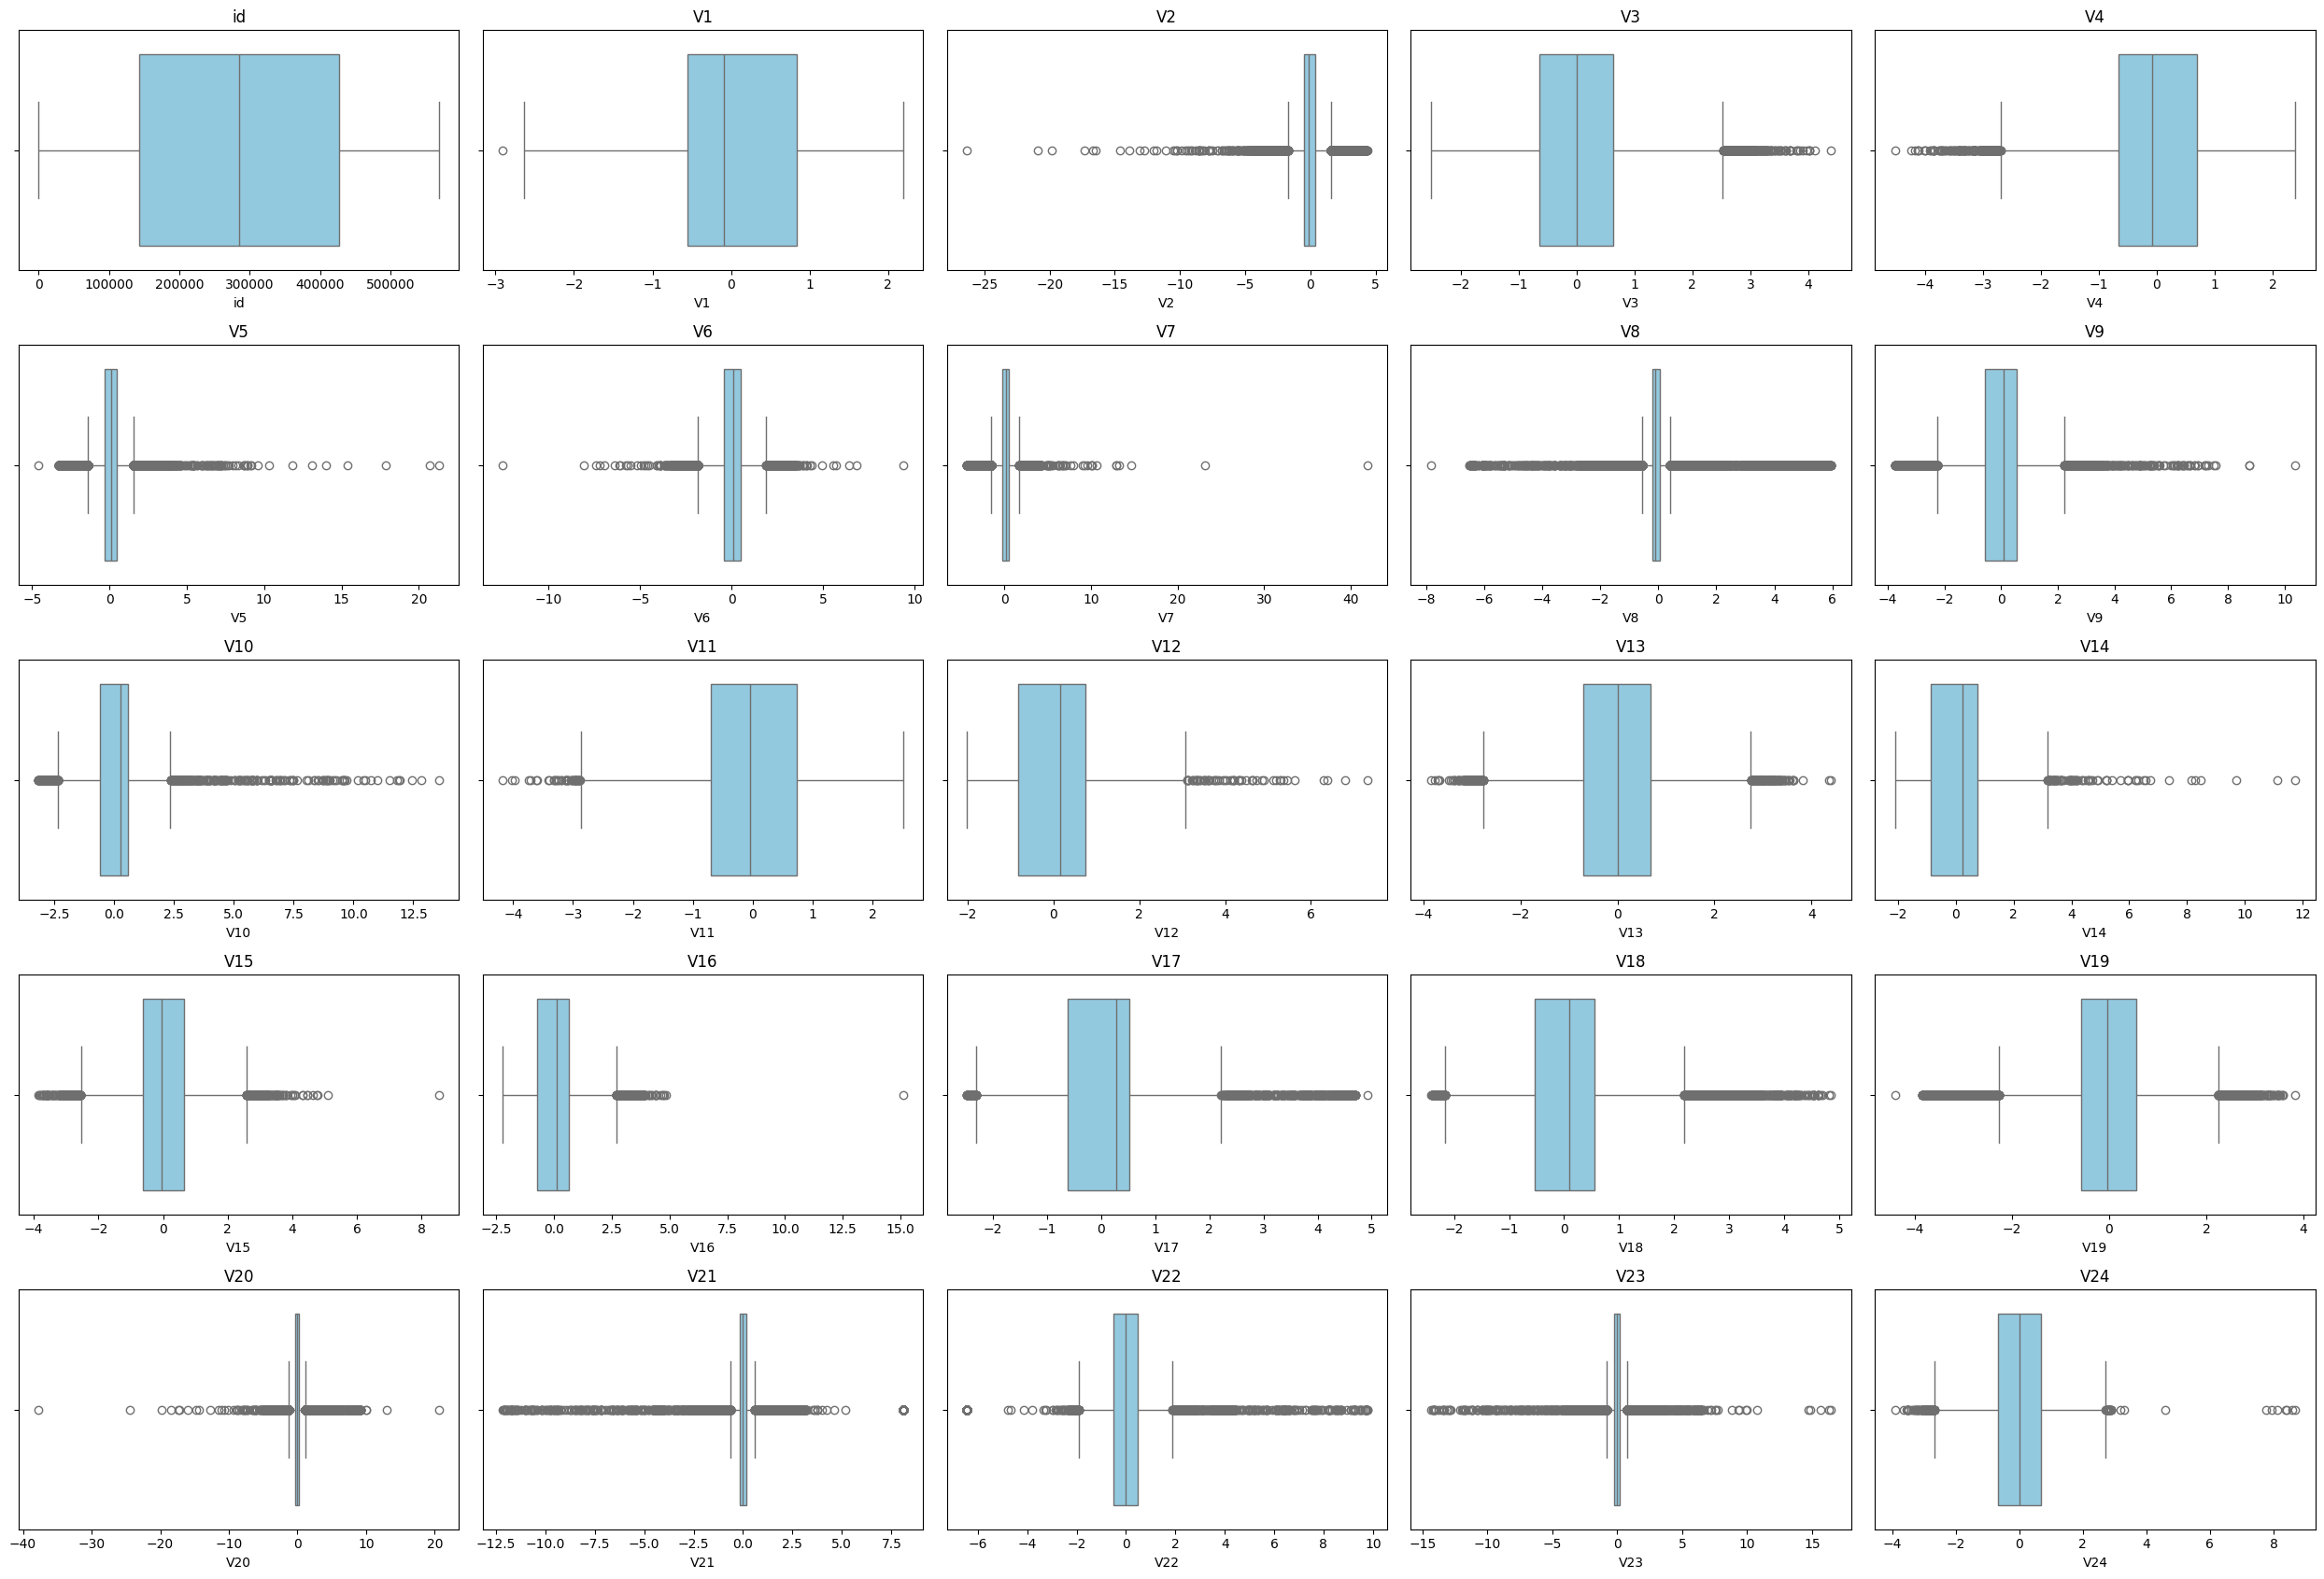

In [16]:
# Num_COLS
NUM_COLS = sampled_df.select_dtypes(include=[np.number]).columns

# Define the number of rows and columns for subplots
num_rows = 5  # 4 rows
num_cols = 5  # 4 columns

# Create subplots with appropriate titles
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 17))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each numerical column and create a box plot
for i, col in enumerate(NUM_COLS[:num_rows * num_cols]):
    sns.boxplot(x=sampled_df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(col)

# Hide empty subplots
for i in range(len(NUM_COLS), num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

<ipython-input-17-e02dbafbdb29>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=skewness.index, y=skewness.values, palette='viridis')


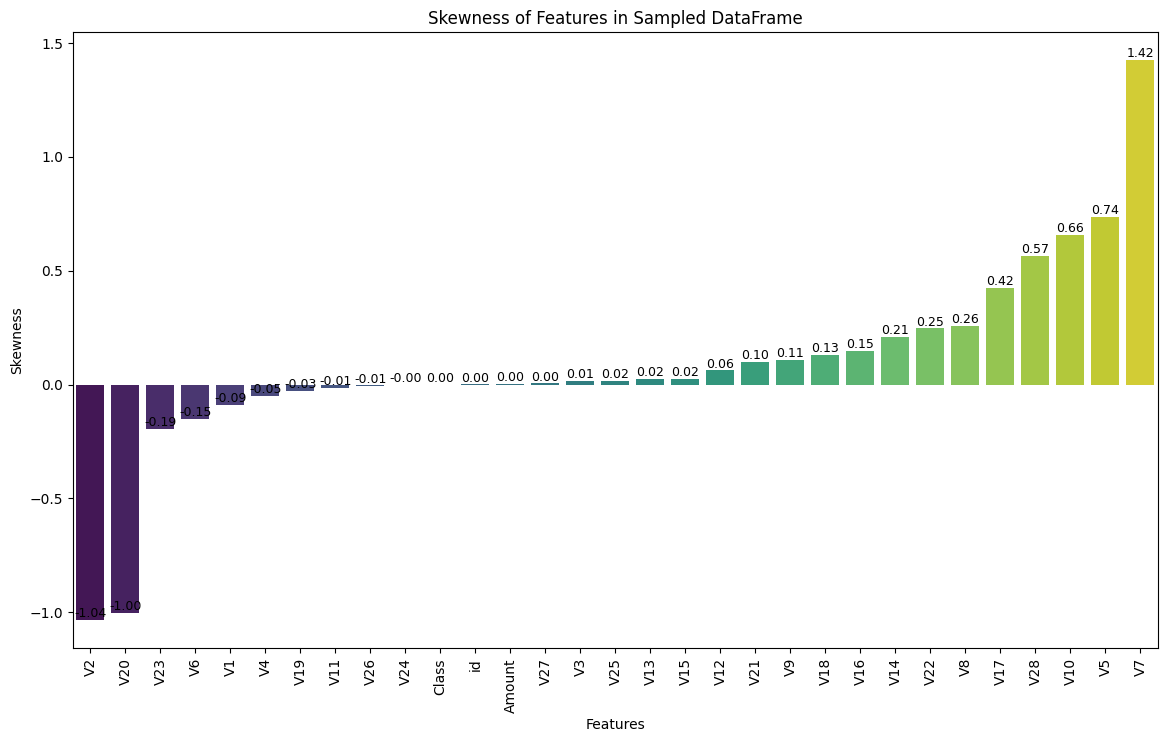

In [17]:
# Sample skewness calculation and sorting
skewness = sampled_df.skew().sort_values()

# Plotting the skewness
plt.figure(figsize=(14, 8))  # Adjusted figure size for better visibility
barplot = sns.barplot(x=skewness.index, y=skewness.values, palette='viridis')
plt.title('Skewness of Features in Sampled DataFrame')
plt.xlabel('Features')
plt.ylabel('Skewness')
plt.xticks(rotation=90)

# Annotate each bar with its skewness value
for i, v in enumerate(skewness.values):
    barplot.text(i, v, f'{v:.2f}', ha='center', va='bottom', fontsize=9)  # Adjusted font size

plt.show()

**Observations:**
* Features like V2, V20 are left skewed.
* Features like V5 right skewed.

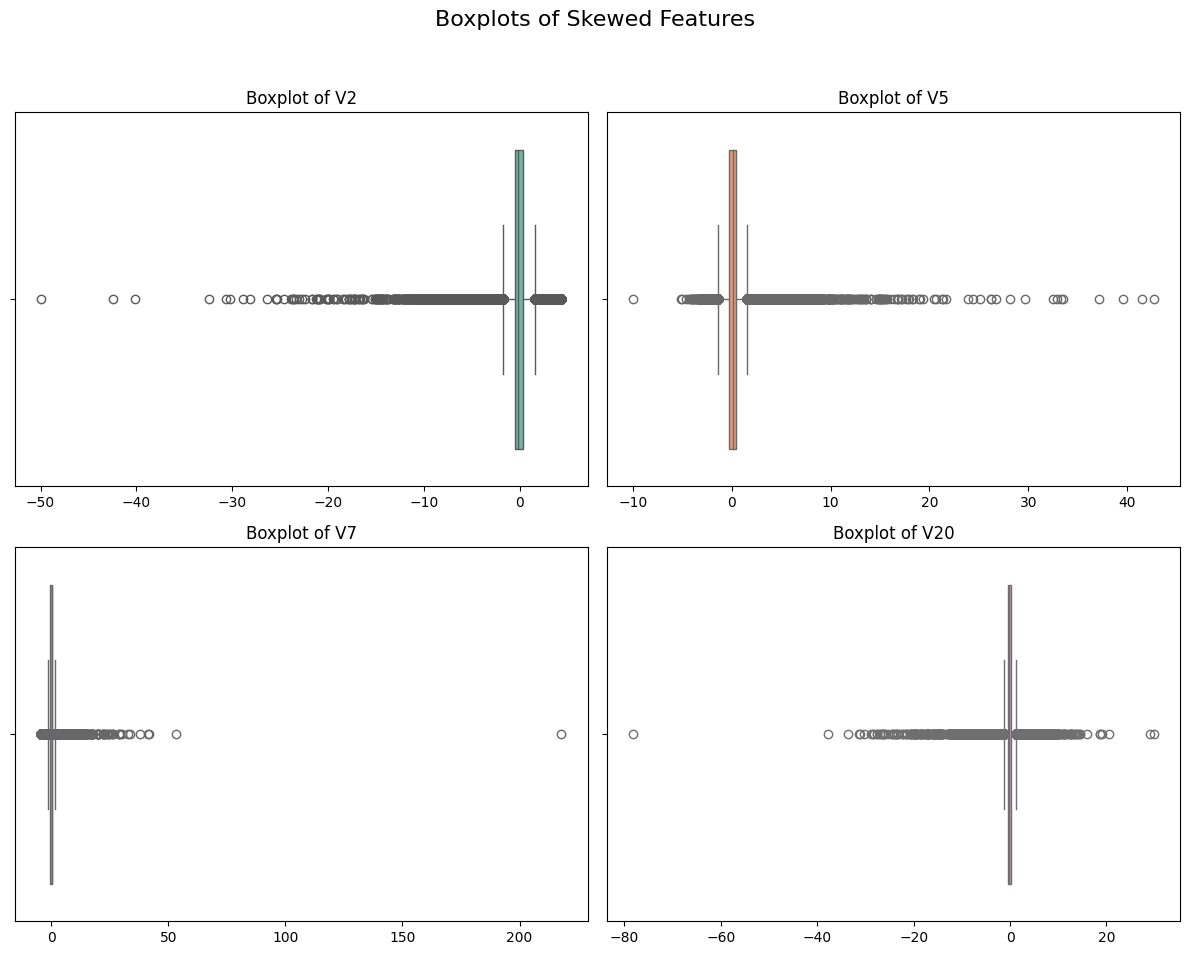

In [18]:
# Skewed features
skewed_features = ['V2', 'V5', 'V7', 'V20']

# Create subplots for boxplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Customize colors
colors = sns.color_palette("Set2")

# Plot boxplots for each skewed feature
for i, feature in enumerate(skewed_features):
    row = i // 2
    col = i % 2
    sns.boxplot(x=feature, data=df, ax=axes[row, col], color=colors[i])
    axes[row, col].set_title(f'Boxplot of {feature}', fontsize=12)
    axes[row, col].set_xlabel('')
    axes[row, col].set_ylabel('')

# Set overall title and adjust layout
plt.suptitle('Boxplots of Skewed Features', size=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

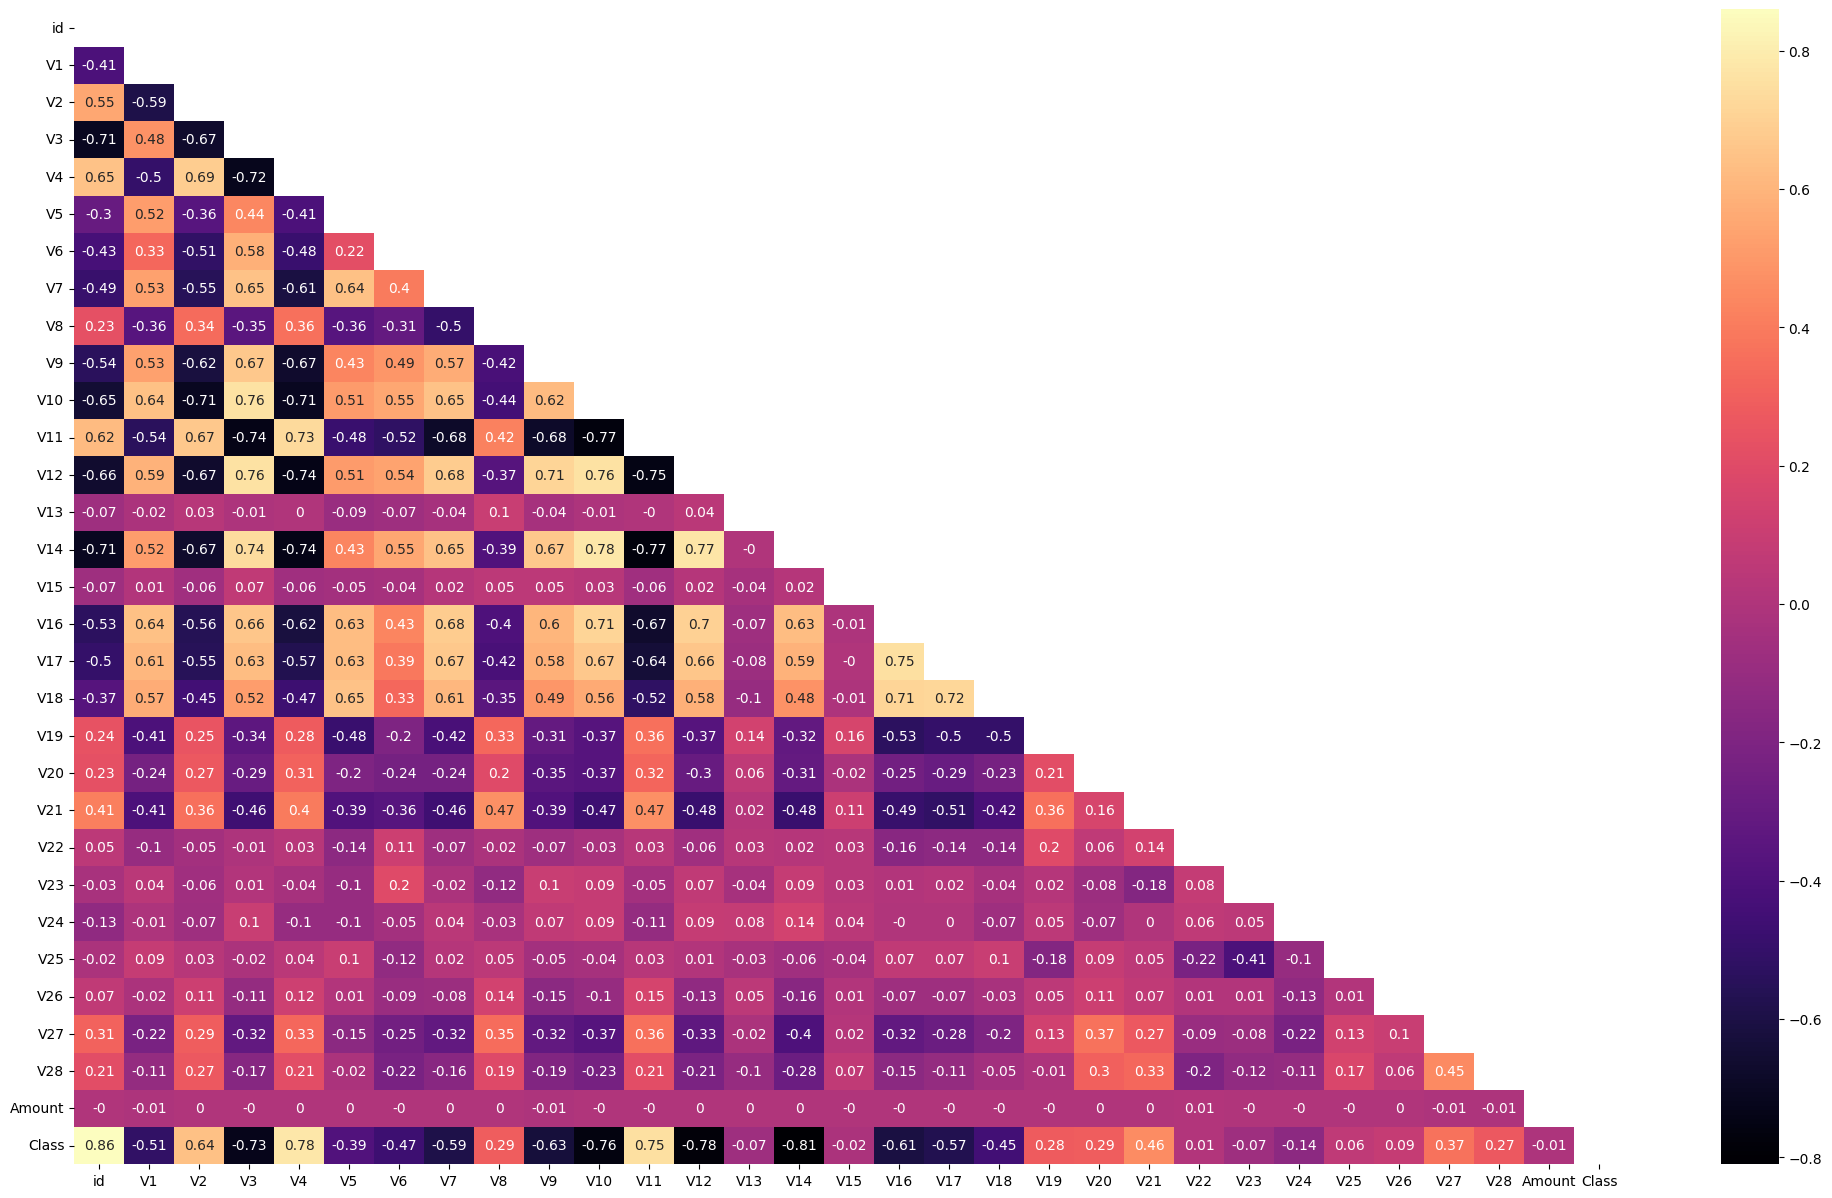

In [19]:
# Plot correlation matrix
corr_df = sampled_df.corr(method = 'spearman').round(2)
mask = np.triu(np.ones_like(corr_df, dtype=bool))
plt.figure(figsize=[25,15])
sns.heatmap(corr_df, cmap=sns.color_palette("magma", as_cmap = True), annot=True, mask = mask)
plt.show()

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [21]:
# Drop the target variable ('Class') before calculating VIF
independent_variables = sampled_df.drop(columns=['Class'])

# Calculate VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["Variable"] = independent_variables.columns
vif_data["VIF"] = [variance_inflation_factor(independent_variables.values, i) for i in range(independent_variables.shape[1])]

print(vif_data)

   Variable       VIF
0        id  3.507269
1        V1  2.124194
2        V2  3.167432
3        V3  3.147964
4        V4  3.091343
5        V5  2.916091
6        V6  2.473478
7        V7  3.617074
8        V8  2.754697
9        V9  2.959786
10      V10  3.948433
11      V11  3.364597
12      V12  4.015044
13      V13  1.159190
14      V14  4.101458
15      V15  1.163169
16      V16  4.825277
17      V17  6.527435
18      V18  4.118279
19      V19  2.019947
20      V20  1.820508
21      V21  3.706937
22      V22  2.791515
23      V23  1.612636
24      V24  1.136810
25      V25  1.399379
26      V26  1.118799
27      V27  1.578910
28      V28  1.330441
29   Amount  2.975474


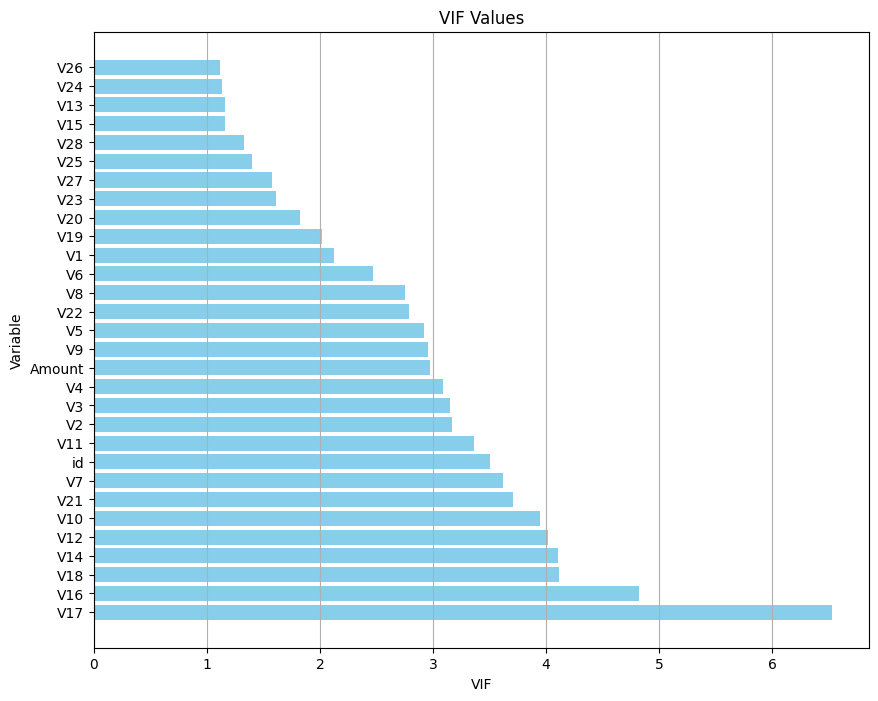

In [22]:
# Sort the VIF data for better visualization
sorted_vif_data = vif_data.sort_values(by='VIF', ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(sorted_vif_data['Variable'], sorted_vif_data['VIF'], color='skyblue')
plt.xlabel('VIF')
plt.ylabel('Variable')
plt.title('VIF Values')
plt.grid(axis='x')
plt.show()

### Observations:

* Variables like 'V17' and 'V16' have particularly high VIF values.
* Multicollinearity exists.

### Data Transformation

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [24]:
# Drop the 'id' column from the DataFrame
sampled_df_without_id = sampled_df.drop(columns=['id'])

# Extract features from DataFrame without 'id'
X = sampled_df_without_id.values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize PCA
pca = PCA()

# Fit PCA to the standardized features
pca.fit(X_scaled)

# Determine the number of principal components to retain
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)
num_components_to_retain = np.argmax(explained_variance_ratio_cumulative >= 0.95) + 1

# Apply PCA transformation to the standardized features
pca = PCA(n_components=num_components_to_retain)
X_pca = pca.fit_transform(X_scaled)

# Convert X_pca to a DataFrame
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i}' for i in range(1, num_components_to_retain+1)])
X_pca_df.head()

# Concatenate X_pca_df with the original DataFrame sampled_df_without_id
standardized_data_df = pd.concat([X_pca_df, sampled_df_without_id], axis=1)
standardized_data_df.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.512710,0.998626,0.618655,-0.664575,0.298020,0.254600,-0.496120,-1.133233,-0.743082,-0.014936,...,0.092349,-0.201438,-0.336156,-1.098793,0.920403,-0.087455,0.374341,0.609420,18686.07,1.0
1,2.179874,-0.678375,-0.842734,0.422855,-0.570773,-1.231243,0.365140,-0.722537,0.191722,0.489768,...,-0.051408,0.482675,0.163935,0.043577,0.070238,0.121992,-0.183288,-0.140915,17850.37,0.0
2,2.245316,-1.049878,-0.365133,0.044798,-0.960657,-1.405600,0.191978,1.314859,0.823489,0.501675,...,0.014988,0.174792,0.329337,0.594062,0.001904,0.748361,-0.393774,-0.657441,4054.30,0.0
3,2.487545,-0.481799,-0.702011,0.061371,-0.988414,0.141091,0.680804,-1.086182,0.050660,0.087301,...,-0.157702,-0.117801,-0.244737,0.605879,0.504699,-0.802421,-0.391701,-0.500213,20287.42,0.0
4,-4.533044,2.125635,0.423317,-1.085174,0.732803,-1.216568,-1.793693,-0.444310,0.986353,0.721145,...,0.304812,-0.505774,-0.341113,-0.690113,1.457289,2.266351,1.705458,1.653902,13095.36,1.0


#Modeling

Features Selection

In [25]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

Selected features: Index(['V1', 'V2', 'V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16'], dtype='object')


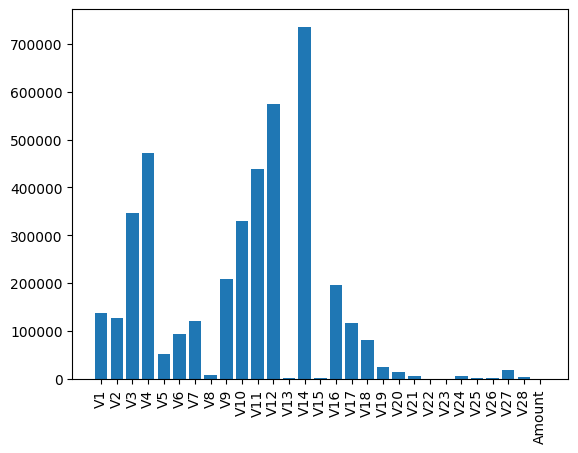

In [26]:
x_data = df.iloc[:, 1:-1] # characteristic value
y_data = df.iloc[:, -1] # labels
# Partition dataset
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=42)
# Using ANOVA F-value as the scoring function to select the best 10 features
selector = SelectKBest(f_classif, k=10)
selector.fit(x_train, y_train)
# Obtain the index of the selected features
selected_features_indices = selector.get_support(indices=True)
# Obtain the name of the selected feature
selected_features_names = x_data.columns[selected_features_indices]
# Print selected feature names
print("Selected features:", selected_features_names)
# Draw rating charts for features
plt.bar(range(len(selector.scores_)), selector.scores_)
plt.xticks(range(len(selector.scores_)), x_data.columns, rotation=90)
plt.show()

In [38]:
# Import necessary libraries
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df[['V1', 'V2', 'V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16']]
y = df['Class']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Random Forest Classifier

In [28]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

In [29]:
# Train a Random Forest classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Evaluate the model
RandomForest_accuracy = accuracy_score(y_test, y_pred)
RandomForest_conf_matrix = confusion_matrix(y_test, y_pred)
RandomForest_report = classification_report(y_test, y_pred)

print(f'Accuracy: {RandomForest_accuracy:.2f}')
print(f'Confusion Matrix:\n{RandomForest_conf_matrix}')
print(f'Classification Report:\n{RandomForest_report}')

Accuracy: 1.00
Confusion Matrix:
[[56573    46]
 [    0 57107]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56619
           1       1.00      1.00      1.00     57107

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



Logistic Regression Classification

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
# Logistic Regression Analysis
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Make predictions
y_pred = log_model.predict(X_test)

# Evaluate the model
LogisticRegression_accuracy = accuracy_score(y_test, y_pred)
LogisticRegression_conf_matrix = confusion_matrix(y_test, y_pred)
LogisticRegression_report = classification_report(y_test, y_pred)

print(f'Accuracy: {LogisticRegression_accuracy:.2f}')
print(f'Confusion Matrix:\n{LogisticRegression_conf_matrix}')
print(f'Classification Report:\n{LogisticRegression_report}')

Accuracy: 0.96
Confusion Matrix:
[[55382  1237]
 [ 3521 53586]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     56619
           1       0.98      0.94      0.96     57107

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726



Support Vector Classifier (SVM)

In [32]:
from sklearn.svm import SVC

In [33]:
# Support Vector Classifier (SVC) model
svc_model = SVC(kernel='linear')

# Train the SVC model
svc_model.fit(X_train, y_train)

# Make predictions
y_pred = svc_model.predict(X_test)

# Evaluate the model
svc_accuracy = accuracy_score(y_test, y_pred)
svc_conf_matrix = confusion_matrix(y_test, y_pred)
svc_report = classification_report(y_test, y_pred)

print(f'Accuracy: {svc_accuracy:.2f}')
print(f'Confusion Matrix:\n{svc_conf_matrix}')
print(f'Classification Report:\n{svc_report}')

Accuracy: 0.96
Confusion Matrix:
[[55540  1079]
 [ 3765 53342]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     56619
           1       0.98      0.93      0.96     57107

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726



Extreme Gradient Boosting (XGBoost)

In [34]:
from xgboost import XGBClassifier

# XGBoost Classifier model
xgb_model = XGBClassifier()

# Train the XGBoost Classifier model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_conf_matrix = confusion_matrix(y_test, y_pred)
xgb_report = classification_report(y_test, y_pred)

print(f'Accuracy: {xgb_accuracy:.2f}')
print(f'Confusion Matrix:\n{xgb_conf_matrix}')
print(f'Classification Report:\n{xgb_report}')

Accuracy: 1.00
Confusion Matrix:
[[56465   154]
 [   11 57096]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56619
           1       1.00      1.00      1.00     57107

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [35]:
# Create a dictionary with evaluation results
evaluation_data = {
    'Model': ['RandomForest', 'LogisticRegression', 'svc', 'xgb'],
    'Accuracy': [RandomForest_accuracy, LogisticRegression_accuracy, svc_accuracy,xgb_accuracy],
}

# Create a dataframe
evaluation_df = pd.DataFrame(evaluation_data)

# Sort the dataframe based on Accuracy and Precision columns in descending order
evaluation_df = evaluation_df.sort_values(by=['Accuracy'], ascending=False)

# Display the sorted dataframe
evaluation_df

,Model,Accuracy
0,RandomForest,0.999596
3,xgb,0.998549
1,LogisticRegression,0.958163
2,svc,0.957406


#Deployment

In [36]:
import pickle

# Save model artifact to local filesystem
# Save XGBoost model as xgboost.pkl
with open('xgboost.pkl', 'wb') as model_file:
  pickle.dump(xgb_model, model_file)

# Save Random Forest model as randomforest.pkl
with open('randomforest.pkl', 'wb') as model_file:
  pickle.dump(classifier, model_file)

# Save Support Vector Classifier model as supportvector.pkl
with open('supportvector.pkl', 'wb') as model_file:
  pickle.dump(svc_model, model_file)

# Save Logistic Regression model as logisticregression.pkl
with open('logisticregression.pkl', 'wb') as model_file:
  pickle.dump(log_model, model_file)

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
